# Tugas Wrangling 3

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-wrangling-3.ipynb
* Contoh: johndoe-ab12-wrangling-3.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

Disclaimer : Konten dibawah dibuat untuk kebutuhan pembuatan tugas data wrangling. Tidak dapat dijadikan standar untuk pengolahan data. Karena tiap data butuh penanganan yang berbeda-beda.

---

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Waktu menunjukkan pukul 16:37, Seta tengah berdiri di sebuah halte bersama ratusan karyawan lainnya. Menunggu bis yang rutenya akan melewati tempat tinggal Seta.

Sebuah pesan singkat baru saja masuk di hp Seta. Valian, teman kelompoknya di lembaga pelatihan data, baru saja mengirimkan sebuah link website. Dalam sekejap Seta langsung mengklik link tersebut. Selang beberapa detik sebuah halaman website tampil di layar HPnya. Mata Seta tertuju ke sebuah tulisan di landing page website "Sayembara Analsis Data Bike Sharing". 

Seta menutup halaman web tersebut, mengetahui maksud valian mengirimkan link tersebut. Ialalu mengirimkan pesan balasan ke Valian. "Ayo kita diskusikan setelah jam makan malam".

Setelah berdiskusi panjang lebar, Seta dan Valian akhirnya memutuskan untuk membagi tugas. Seta mendapatkan tugas untuk melakukan eksplorasi dan beberapa analisis terhadap dataset yang diberikan dalam sayembara tersebut, sedangkan Valian akan mengerjakan bagian pemodelannya.

"Aku akan mulai pengerjaannya besok ya Val" kata Seta sebelum menutup diskusi pada malam itu. "Okee!"  jawab Valian sambil mengacungkan jempolnya.

Keesokan harinya, sebelum mulai mengerjakan sayembaranya, Seta masuk ke halaman website untuk mengunduh dataset yang telah disediakan oleh pihak yang memberikan sayembara. Datanya disimpan dalam bentuk zip dan terdapat dua folder didalamnya. Folder bike_sharing berisi informasi peminjaman sepeda dan folder bike_sharing_weather berisi informasi musim dan cuaca.

1. Dari file data bike_sharing, gabungkan kedua data tersebut kedalam satu table. 

> Note: Perhatikan index data

In [32]:
bike_2011 = pd.read_csv('../data/bike_sharing/bike_2011.csv') # Inputkan Kode Disini
bike_2012 = pd.read_csv('../data/bike_sharing/bike_2012.csv') # Inputkan Kode Disini
bike_data = pd.concat([bike_2011, bike_2012]) # Inputkan Kode Disini
bike_data

,datetime,holiday,workingday,casual,registered,count
0,2011-01-01 00:00:00,0,0,3,13,16
1,2011-01-01 01:00:00,0,0,8,32,40
2,2011-01-01 02:00:00,0,0,5,27,32
3,2011-01-01 03:00:00,0,0,3,10,13
4,2011-01-01 04:00:00,0,0,0,1,1
...,...,...,...,...,...,...
5459,2012-12-19 19:00:00,0,1,7,329,336
5460,2012-12-19 20:00:00,0,1,10,231,241
5461,2012-12-19 21:00:00,0,1,4,164,168
5462,2012-12-19 22:00:00,0,1,12,117,129


Mengawali eksplorasi ini, Seta ingin melihat apakah terdapat peningkatan/penurunan jumlah peminjaman sepeda dari tahun 2011 ke 2012

2. Berapa persen peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012

In [38]:
# bike_data['datetime'] = bike_data['datetime'].str[:4]
(bike_data[bike_data['datetime'].str[:4] == '2012']['registered'].count() -\
bike_data[bike_data['datetime'].str[:4] == '2011']['registered'].count()) / bike_data[bike_data['datetime'].str[:4] == '2012']['registered'].count()

0.0076866764275256225

In [ ]:
persen_2011_2012 = # Inputkan Kode Disini
print(f"Dari 2011 ke 2012 terjadi peningkatan peminjaman sepeda sebanyak {persen_2011_2012:.2f}%")

Dari 2011 ke 2012 terjadi peningkatan peminjaman sepeda sebanyak 66.69%


Menarik!, dari hasil diatas terlihat terjadi peningkatan jumlah peminjaman sepeda sebanyak 66% dari tahun 2011 ke 2012. Seta kemudian mengetik beberapa baris kode lagi untuk melihat trend bulanan  peminjaman sepeda.

3. tampilkan trend bulanan data peminjaman sepeda tahun 2011 dan 2012

> Note: 
> - Gunakan kolom **count**
> - Buat agar data pada kolom datetime bertipe datetime

In [44]:
dx = bike_data
dx['datetime'] = pd.to_datetime(dx['datetime'])
dx['datetime'].groupby([dx.datetime.dt.year])
dx

# dxx.plot(kind='line', figsize=(12, 5))

,datetime,holiday,workingday,casual,registered,count
0,2011-01-01 00:00:00,0,0,3,13,16
1,2011-01-01 01:00:00,0,0,8,32,40
2,2011-01-01 02:00:00,0,0,5,27,32
3,2011-01-01 03:00:00,0,0,3,10,13
4,2011-01-01 04:00:00,0,0,0,1,1
...,...,...,...,...,...,...
5459,2012-12-19 19:00:00,0,1,7,329,336
5460,2012-12-19 20:00:00,0,1,10,231,241
5461,2012-12-19 21:00:00,0,1,4,164,168
5462,2012-12-19 22:00:00,0,1,12,117,129


month
2011-01     23552
2011-02     32844
2011-03     38735
2011-04     50517
2011-05     79713
2011-06     89776
2011-07     92848
2011-08     83296
2011-09     79104
2011-10     79522
2011-11     70889
2011-12     61183
2012-01     56332
2012-02     66269
2012-03     94766
2012-04    116885
2012-05    120434
2012-06    130957
2012-07    121769
2012-08    130220
2012-09    133425
2012-10    127912
2012-11    105551
2012-12     98977
Freq: M, Name: count, dtype: int64

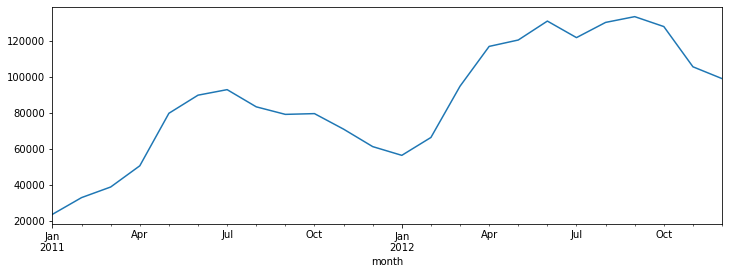

In [ ]:
monthly_bike_sharing = # Inputkan kode disini
monthly_bike_sharing.plot(figsize=(12, 4))
monthly_bike_sharing

Trend diatas cukup menarik, terlihat peningkatan jumlah peminjaman sepeda terjadi di Kuartal 2 sampai akhir Kuartal 3 tiap tahunnya. Namun diawal Kuartal 4 mulai terjadi penurunan hingga mencapai titik terendah di bulan Januari.

"Kita perlu mengetahui penyebab trend ini" kata Valian, "namun data yang dimiliki sekarang tidak cukup untuk bisa mengetahui hal tersebut" Balas Seta. "Bagaimana dengan data di folder bike_sharing_weather?". Seta kemudian membuka kembali folder data menuju ke folder bike_sharing_weather. Seta membuka data tersebut, "Datanya memiliki record yang sama pada kolom datetime" kata Seta ke Valian sambil menunjuk kolom datetime dari kedua data. "Bagus berarti kita bisa menggabungkan datanya" Valian menepuk pundak Seta.

5. Gabungkan data weather tahun 2011 dan 2012 dengan bike_data menjadi satu tabel.

> Note: Pastikan kolom datetime bertipe datetime

In [ ]:
bike_sharing_data = # Inputkan kode disini
bike_sharing_data

,datetime,holiday,workingday,casual,registered,count,month,season,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,non-holiday,breakday,3,13,16,2011-01,1,1,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,non-holiday,breakday,8,32,40,2011-01,1,1,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,non-holiday,breakday,5,27,32,2011-01,1,1,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,non-holiday,breakday,3,10,13,2011-01,1,1,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,non-holiday,breakday,0,1,1,2011-01,1,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,non-holiday,workingday,7,329,336,2012-12,4,1,15.58,19.695,50,26.0027
10882,2012-12-19 20:00:00,non-holiday,workingday,10,231,241,2012-12,4,1,14.76,17.425,57,15.0013
10883,2012-12-19 21:00:00,non-holiday,workingday,4,164,168,2012-12,4,1,13.94,15.910,61,15.0013
10884,2012-12-19 22:00:00,non-holiday,workingday,12,117,129,2012-12,4,1,13.94,17.425,61,6.0032


Dari data yang telah di-read terlihat di beberapa kolom informasinya tidak deskriptif sehingga akan membingungkan Seta. Ia kemudian membuka halaman website tersebut untuk mendapatkan deskripsi dari datanya. http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset. 

"Sepertinya aku perlu merubah nilai beberapa kolom" Gumam Seta dalam hati.

6. Bedasarkan deskripsi data pada website ubahlah kolom `season` dan `weather` menggunakan fungsi map:
 * `season`: 1 menjadi "winter", 2 menjadi "spring", 3 menjadi "summer", 4 menjadi "fall"
 * `weather`: 1 menjadi "_clear_", 2 menjadi "_cloudy_", 3 menjadi "_light snow/rain_", 4 menjadi "_heavy snow/rain_"

In [ ]:
# Inputkan kode disini
bike_sharing_data

,datetime,holiday,workingday,casual,registered,count,month,season,weather,temp,atemp,humidity,windspeed
0,2011-01-01 00:00:00,non-holiday,breakday,3,13,16,2011-01,winter,clear,9.84,14.395,81,0.0000
1,2011-01-01 01:00:00,non-holiday,breakday,8,32,40,2011-01,winter,clear,9.02,13.635,80,0.0000
2,2011-01-01 02:00:00,non-holiday,breakday,5,27,32,2011-01,winter,clear,9.02,13.635,80,0.0000
3,2011-01-01 03:00:00,non-holiday,breakday,3,10,13,2011-01,winter,clear,9.84,14.395,75,0.0000
4,2011-01-01 04:00:00,non-holiday,breakday,0,1,1,2011-01,winter,clear,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,non-holiday,workingday,7,329,336,2012-12,fall,clear,15.58,19.695,50,26.0027
10882,2012-12-19 20:00:00,non-holiday,workingday,10,231,241,2012-12,fall,clear,14.76,17.425,57,15.0013
10883,2012-12-19 21:00:00,non-holiday,workingday,4,164,168,2012-12,fall,clear,13.94,15.910,61,15.0013
10884,2012-12-19 22:00:00,non-holiday,workingday,12,117,129,2012-12,fall,clear,13.94,17.425,61,6.0032


Oke! datanya terlihat lebih baik. Sekarang kita coba lihat apakah musim dan cuaca berkorelasi terhadap jumlah peminjaman sepeda.

7. Berapa banyak jumlah peminjaman sepeda tiap musimnya pada tahun 2011 dan 2012

In [ ]:
count_by_season = # Inputkan kode disini
count_by_season

year  season
2011  fall      211594
      spring    220006
      summer    255248
      winter     95131
2012  fall      332440
      spring    368276
      summer    385414
      winter    217367
Name: count, dtype: int64

8. a. Berapa jumlah peminjaman sepeda pada masing-masing kelompok cuaca?
    
   b. Apakah trend peminjaman berdasarkan cuaca berlaku di semua musim?

In [ ]:
#8.a
count_by_weather = # Inputkan kode disini
count_by_weather

weather
clear              1476063
cloudy              507160
heavy snow/rain        164
light snow/rain     102089
Name: count, dtype: int64

In [ ]:
#8.b
count_by_season_weather = # Inputkan kode disini
count_by_season_weather

season  weather        
fall    clear              356588
        cloudy             157191
        light snow/rain     30255
spring  clear              426350
        cloudy             134177
        light snow/rain     27755
summer  clear              470116
        cloudy             139386
        light snow/rain     31160
winter  clear              223009
        cloudy              76406
        heavy snow/rain       164
        light snow/rain     12919
Name: count, dtype: int64

"Hmmm ternyata cuaca memiliki korelasi terhadap jumlah peminjaman sepeda" sahut Valian sambil menatap layar PC Seta. <br />
"Iya benar, tidak hanya itu, Musim juga berkorelasi terhadap jumlah peminjaman Sepeda Val". 

"Bagaimana dengan temperature Ta?" tanya Valian. <br />
"Mari kita lihat! Aku akan menampilkan data hariannya" jawab Seta. <br />
"Bisakah kau mengikutkan data temperature, Namun tampilkan data rata-rata dari keduanya (coun dan temperature)" tambah Valian. <br />
"Oke! aku coba dulu ya Val" Seta kembali menatap monitornya

9. Sajikan informasi mengenai trend harian jumlah peminjaman sepeda dan rata-rata temperature harian.

<AxesSubplot:xlabel='date'>

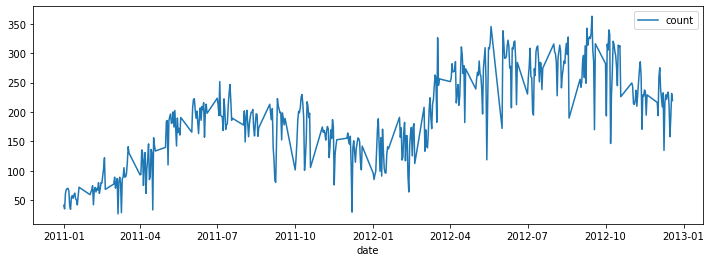

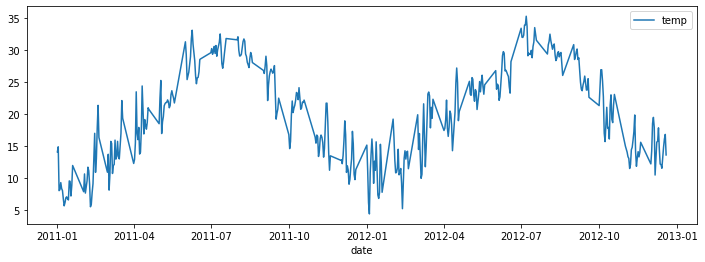

In [ ]:
daily_count = # Inputkan kode disini
daily_temp = # Inputkan kode disini

daily_count.plot(figsize=(12, 4))
daily_temp.plot(figsize=(12, 4))

10. Gunakan operasi rolling window untuk melihat trend rata-rata tiap 20 hari.

> Note: Set window = 20

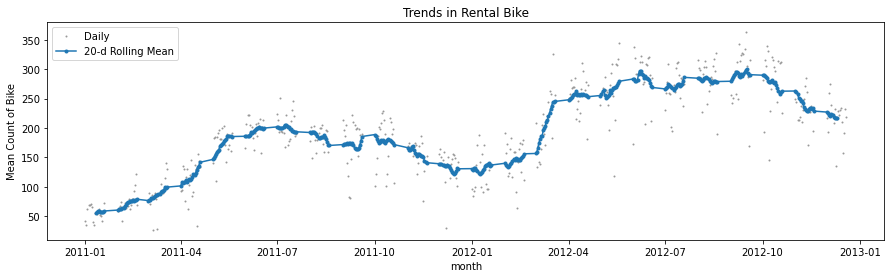

In [ ]:
monthly_mean_count = # Inputkan kode disini

fig, ax = plt.subplots(figsize=(15,4))

ax.plot(daily_count['count'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(monthly_mean_count.loc[:, 'count'],
marker='.', linestyle='-', label='20-d Rolling Mean')

ax.legend()
ax.set_xlabel('month')
ax.set_ylabel('Mean Count of Bike')
ax.set_title('Trends in Bike Sharing');

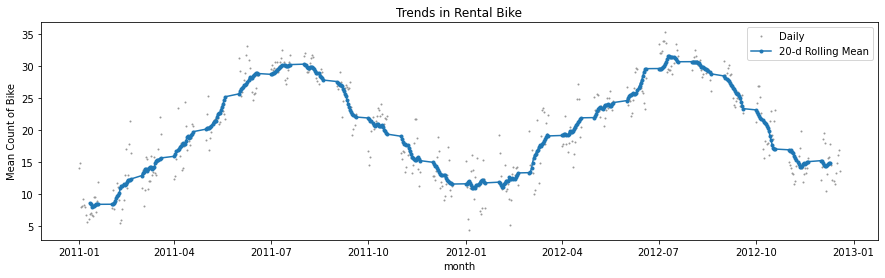

In [ ]:
monthly_mean_temp = # Inputkan kode disini
monthly_mean_temp

fig, ax = plt.subplots(figsize=(15,4))

ax.plot(daily_temp['temp'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')

ax.plot(monthly_mean_temp.loc[:, 'temp'],
marker='.', linestyle='-', label='20-d Rolling Mean')

ax.legend()
ax.set_xlabel('month')
ax.set_ylabel('Mean Count of Bike')
ax.set_title('Trends in Bike Sharing');

####  Soal Bonus

###### Apakah jumlah peminjaman sepeda yang dilakukan oleh user terdaftar dan tidak terdaftar memiliki trend yang sama tiap harinya? 

In [ ]:
# Inputkan kode disini
day_group

C:\Users\faiza\AppData\Local\Temp\ipykernel_19612\1093711362.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_group = bike_sharing_data.groupby(['dayname'])['casual', 'registered'].sum().reindex(cats)


,casual,registered
dayname,,
Monday,46288,249008
Tuesday,35365,256620
Wednesday,34931,257295
Thursday,37283,269118
Friday,47402,255102
Saturday,100782,210736
Sunday,90084,195462


<AxesSubplot:xlabel='dayname'>

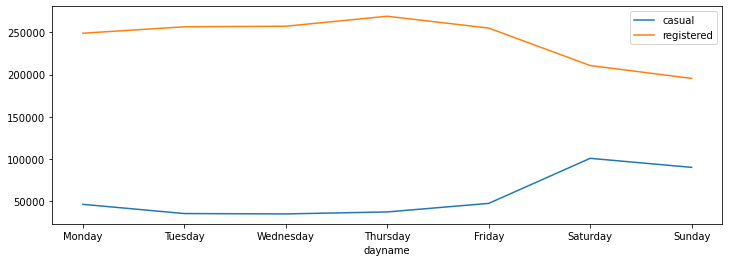

In [ ]:
day_group.plot(figsize=(12, 4))

Berikan argumen anda, kemungkinan apa yang dapat menyebabkan trend tersebut?

###### Bagaimana dengan trend jumlah peminjaman sepeda yang dilakukan oleh user terdaftar dan tidak terdaftar tiap jamnya  ?

C:\Users\faiza\AppData\Local\Temp\ipykernel_19612\596763310.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hour_group = bike_sharing_data.groupby('hour')['casual', 'registered'].sum()


<AxesSubplot:ylabel='hour'>

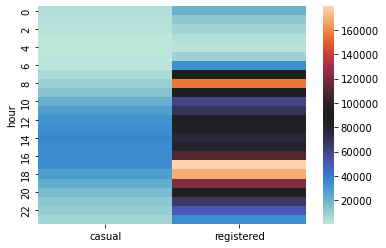

In [ ]:
hour_group = # Inputkan kode disini
sns.heatmap(hour_group, cmap='icefire')

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

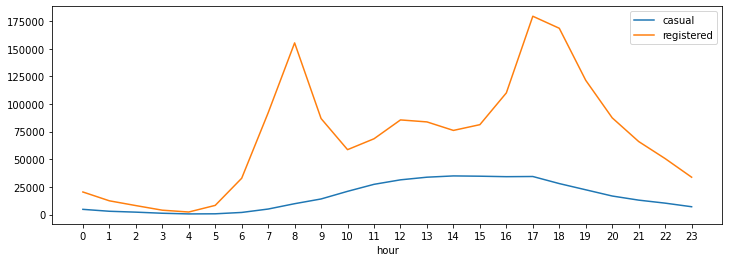

In [ ]:
ax = hour_group.plot(figsize=(12, 4))
ax.set_xticks(range(len(list(hour_group.index))))
ax.set_xticklabels(list(hour_group.index))

Berikan argumen anda, kemungkinan apa yang dapat menyebabkan trend tersebut?